In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import json, tweepy, requests, re, string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import nltk

In [2]:
with open("token.json")as f:
  tokens = json.load(f)

bearer_token = tokens['bearer_token']
api_key = tokens['api_key']
api_key_secret = tokens['api_key_secret']
access_token = tokens['access_token']
access_token_secret = tokens['access_token_secret']

auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [68]:
search_words = "gempa"
new_search = search_words + " -filter:retweets"
date = '2022-01-26'


Dikarenkan banyaknya gemapa yang terjadi akhir akhir ini sehingga membuat topik gempa menjadi banyak dibicarakan oleh orang baik di media sosial, media massa, maupun pada saat melakukan interaksi langsung.
Dikarenakan alasan yang sebelumnya maka dari itu disini ingin mendapatkan informasi tentang apa saja yang dibicarakan dari topik gempa tersebut

In [69]:
tweets = tweepy.Cursor(api.search_tweets,
        q=new_search,
        lang="id",
        until = date).items(2000)

items = []
for tweet in tweets:
    items.append (tweet.text)

df = pd.DataFrame(data=items, columns=['tweet'])
df.to_csv('gempa_tweet.csv', index=False) 
df

,tweet
0,"@cattleyaishmn Halo, saya Bencana Bot. Untuk m..."
1,Tbh kadang gue mikir pindah ibu kota tuh krn s...
2,Bisa ngga sih Tweet nya jangan info gempa teru...
3,Selamat pagii Sarapan roti boy dan white coffe...
4,@AdamPrakoso17 Gempa ora?\n\nInnalillahi \nAlh...
...,...
1995,woiii gempa :(
1996,@raijull Lu ga gempa bang?
1997,@noonauni_ptg gempa dimana? 🥺
1998,@dnxvx lah iya ternyata gempa


In [3]:
df = pd.read_csv('gempa_tweet.csv')

df['clean_tweet'] = df['tweet']

def case_folding(text):
    text = text.lower()
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    text = text.encode('ascii', 'replace').decode('ascii')
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    text = text.replace("http://", " ").replace("https://", " ")
    text = re.sub(r"\d+", "", text)
    text = text.translate(str.maketrans("","",string.punctuation))
    text = text.strip()
    text = re.sub('\s+',' ',text)
    return re.sub(r"\b[a-zA-Z]\b", "", text)

slang_list =[
    ("yg","yang"),
    ("gue","saya"),
    ("km",""),
    ("jan","januari"),
    ("mag","magnitudo"),
    ("lok","lokasi"),
    ("kalo","kalau"),
    ("lu","kamu"),
    ("ls",""),
    ("kedlmn","kedalaman"),
    ("goyang","berguncang"),
    ("sr",""),
    ("pas","saat"),
    ("boboiboy",""),
    ("udah","sudah"),
    ("gua","saya"),
    ("ngerasa","berasa"),
    ("kayak","seperti"),
    ("bgt","sangat"),
    ("banget","sangat"),
    ("sulsel","sulawesi selatan"),
    ("dah","sudah"),
    ("kek","seperti"),
    ("dikit","sedikit"),
    ("da",""),
    ("tp","tapi"),
    ("gw","saya"),
    ("sampe","sampai"),
    ("lg","lagi"),
    ("kemaren","kemarin"),
    ("dikit","sedikit"),
    ("kena","terkena"),
    ("baratdaya","barat daya"),
    ("klo","kalau"),
    ("ni","ini"),
    ("emang","memang"),
    ("gitu","seperti itu"),
    ("geter","bergetar"),
    ("emang","memang"),
    ("eh",""),
    ("mulu","selalu"),
    ("kenceng","kencang"),
    ("abis","habis"),
    ("ngerasain","merasakan"),
    ("deh",""),
    ("bener","benar"),
    ("gk","tidak"),
    ("wkwk",""),
    ("jg","juga"),
    ("kerasa","terasa"),
    ("gimana","bagaimana"),
    ("gede","besar"),
    ("dr","dari"),
    ("geser","bergeser"),
    ("gara",""),
    ("kak",""),
    ("kirain",""),
    ("dgn","dengan"),
    ("pd","pada"),
    ("trs",""),
    ("trus",""),
    ("lo","kamu"),
    ("ngga","tidak"),
    ("kebangun","terbangun"),
    ("org","seseorang"),
    ("roboh","rubuh"),
    ("doang","saja"),
    ("kaget","terkejut"),
    ("stay","tetap"),
    ("liat","lihat"),
    ("sm","sama"),
    ("tu",""),
    ("baratlaut","barat laut"),
    ("karna","karena"),
    ("jepun","jepang"),
    ("udh","sudah"),
    ("safe","aman"),
    ("oleng",""),
    ("halu",""),
    ("emg","emang"),
    ("kmrn","kemarin"),
    ("candiqqdotnet",""),
    ("link",""),
    ("skrg","sekarang"),
    ("semalem","semalam"),
    ("nanya","bertanya"),
    ("gini","begini"),
    ("yaa","ya"),
    ("keknya","sepertinya"),
    ("dlm","dalam"),
    ("oh",""),
    ("hah",""),
    ("ikn",""),
    ("puyeng","pusing"),
    ("ki",""),
    ("yaallah",""),
    ("ku","saya"),
    ("bentar","sebentar"),
    ("malem","malam"),
    ("anying",""),
    ("anjay",""),
    ("bgttt","sangat"),
    ("krasa","terasa"),
    ("gmn","gimana"),
    ("ko",""),
    ("loh",""),
    ("gak","tidak"),
    ("kwangya",""),
    ("gegara","karena"),
    ("tuh",""),
    ("tbh","sejujurnya"),
    ("pagii","pagi"),
    ("belom","belum"),
    ("krna","karena"),
    ("thn","tahun"),
    ("wkwkwk",""),
    ("aja","saja"),
    ("sih",""),
    ("jd","jadi"),
    ("bt","buat"),
    ("blm","belum"),
    ("grgr","gara gara"),
    ("tdk","tidak"),
    ("pdhl","padahal"),
    ("ehhh",""),
    ("diem","diam"),
    ("ama","dengan"),
    ("btw",""),
    ("tbtb","tiba tiba"),
    ("tdi","tadi"),
    ("temen","teman"),
    ("mikir","berpikir"),
    ("kadang","terkadang"),
    ("kmaren","kemarin"),
    ("ora","tidak"),
    ("mung","hanya"),
    ("atos","keras"),
    ("poll","sangat"),
    ("semooga","semoga"),
    ("kam",""),
    ("gilira","giliran"),
    ("gledek","geledek"),
    ("syg",""),
    ("liattanya","lihatnya"),
    ("inget","ingat"),
    ("serem","seram"),
    ("yaaa","ya"),
    ("iyaa","ya"),
    ("aamiin","amin"),
    ("solat","sholat"),
    ("anjir",""),
    ("emang","memang"),
    ("kyk","seperti") 
]

def slang_cleaner(text, slang_list:list=[]):
    word_token = word_tokenize(text)
    word_list=[]
    
    for word in word_token:
        for slang in slang_list:
            if word.lower() in slang[0].lower():
                word = slang[1]
                break
        word_list.append(word)
        
    text =' '.join(word_list)
    return text

def tokenizing(text):
    text = word_tokenize(text)
    return text

def stopword_cleaner(data):
    sw_indonesia = stopwords.words("indonesian")
    data  = [word for word in data if word not in sw_indonesia]
    data = ' '.join(data)
    return data

df['clean_tweet'] = df['clean_tweet'].apply(lambda x: case_folding(x))
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: slang_cleaner(x, slang_list))
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: tokenizing(x))
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: stopword_cleaner(x))

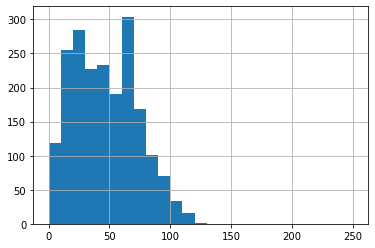

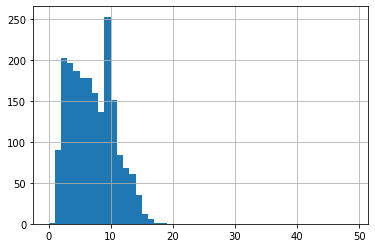

C:\Users\steve\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\steve\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


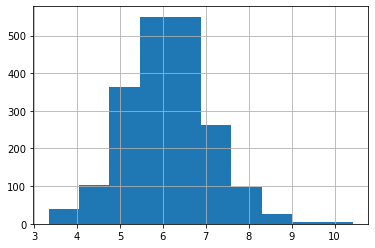

<FreqDist with 3301 samples and 13117 outcomes>
  
[('gempa', 1948), ('terkadang', 388), ('berguncang', 374), ('lombok', 279), ('bencana', 170), ('dampak', 164), ('halo', 158), ('melaporkan', 156), ('sekitarmu', 156), ('bot', 155), ('silakan', 155), ('balas', 155), ('terbangun', 134), ('pagi', 113), ('bumi', 97), ('barat', 90), ('subuh', 89), ('tidur', 85), ('magnitudo', 82), ('berasa', 78), ('daya', 73), ('kedalaman', 69), ('aman', 66), ('januari', 65), ('dimana', 58), ('info', 56), ('merasakan', 54), ('bmkg', 53), ('kemarin', 51), ('tsunami', 51), ('trauma', 51), ('sholat', 50), ('ya', 50), ('semoga', 47), ('bali', 46), ('terkejut', 46), ('update', 46), ('beneran', 45), ('jam', 45), ('barusan', 44), ('guncang', 41), ('dibangunin', 41), ('orang', 40), ('langsung', 39), ('habis', 38), ('mengguncang', 32), ('min', 32), ('lokasi', 31), ('tau', 30), ('takut', 29), ('susulan', 29), ('lari', 29), ('rumah', 29), ('mataram', 29), ('mimpi', 28), ('teman', 27), ('banten', 27), ('kali', 27), ('s

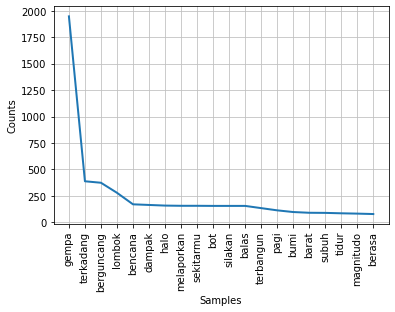

(dampak, gempa)         160
(halo, bencana)         155
(gempa, sekitarmu)      155
(silakan, balas)        155
(sekitarmu, silakan)    155
(bencana, bot)          155
(melaporkan, dampak)    155
(bot, melaporkan)       155
(terkadang, gempa)      153
(gempa, gempa)          109
(gempa, lombok)          95
(gempa, berguncang)      89
(barat, daya)            73
(gempa, bumi)            71
(lombok, gempa)          53
(gempa, magnitudo)       47
(berguncang, gempa)      46
(terbangun, gempa)       46
(gempa, dimana)          45
(info, gempa)            42
dtype: int64


In [5]:
#Distribusi Frekuensi Jumlah Karakter per Data
bin_range = np.arange(0, 260, 10)
df['clean_tweet'].str.len().hist(bins=bin_range)
plt.show()

#Distribusi Frekuensi Jumlah Kata per Data
bin_range = np.arange(0, 50)
df['clean_tweet'].str.split().map(lambda x: len(x)).hist(bins=bin_range)
plt.show()

#Distribusi Frekuensi Panjang Kata Rata-Rata Pada Data
df['clean_tweet'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()
plt.show()

#Distribusi Frekuensi Kata
query = df['clean_tweet'].apply(lambda x: word_tokenize(str(x)))
clean_tweet = [word for tweet in query for word in tweet]
fqdist = FreqDist(clean_tweet)
print(fqdist)
print('  ')
most_common_word = fqdist.most_common(300)
print(most_common_word)
print('  ')
fqdist.plot(20,cumulative=False)
plt.show()

#Distribusi Bigram
result = pd.Series(nltk.ngrams(clean_tweet, 2)).value_counts()[:20]
print(result)



In [6]:
#Lakukan Sentiment Analysis 

hasil = []
pos_list= open("./kata_positif.txt","r")
pos_kata = pos_list.readlines()
neg_list= open("./kata_negatif.txt","r")
neg_kata = neg_list.readlines()  
list_anti = ['tidak','lawan','anti', 'belum', 'belom', 'tdk', 'jangan', 'gak', 'enggak', 'bukan', 'sulit', 'tak', 'sblm']

items = df['clean_tweet'].values.tolist()

for item in items:
    print(item.strip())
    tweets = item.strip().split() #tokenization
    # print(tweets)
    count_p = 0 #nilai positif
    count_n = 0 #nilai negatif
    
    for tweet in tweets:
        for kata_pos in pos_kata:
            if kata_pos.strip().lower() == tweet.lower():
                if items[items.index(item)-1] in list_anti:
                    print(items[items.index(item)-1], kata_pos, ['negatif'])
                    count_n += 1
                else:
                    print(kata_pos, ['positif'])
                    count_p += 1
        for kata_neg in neg_kata:
            if kata_neg.strip().lower() == tweet.lower():
                if items[items.index(item)-1] in list_anti:
                    print(items[items.index(item)-1], kata_neg, ['positif'])
                    count_p += 1
                else:
                    print(kata_neg, ['negatif'])
                    count_n += 1
    
    print ("positif: "+str(count_p))
    print ("negatif: "+str(count_n))
    hasil.append(count_p - count_n)
    print ("-----------------------------------------------------")
    
print ("Nilai rata-rata: "+str(np.mean(hasil)))
print ("Standar deviasi: "+str(np.std(hasil)))

halo bencana bot melaporkan dampak gempa sekitarmu silakan balas
bencana
 ['negatif']
melaporkan
 ['positif']
dampak
 ['negatif']
gempa
 ['negatif']
balas
 ['negatif']
positif: 1
negatif: 4
-----------------------------------------------------
sejujurnya terkadang berpikir pindah kota sebenernya pemerintah tau potensi gempa cepet
potensi
 ['positif']
gempa
 ['negatif']
positif: 1
negatif: 1
-----------------------------------------------------
tweet info gempa sekalikali infonya berguncang bikin orang bahagia
gempa
 ['negatif']
bahagia
 ['positif']
positif: 1
negatif: 1
-----------------------------------------------------
selamat pagi sarapan roti terkadang white coffe scroll twitter terkadang berita gempa takut kemarin denpasar
selamat
 ['positif']
gempa
 ['negatif']
takut
 ['negatif']
positif: 1
negatif: 2
-----------------------------------------------------
gempa innalillahi alhamdulillah aman keras
gempa
 ['negatif']
alhamdulillah
 ['positif']
aman
 ['positif']
positif: 2
negatif

-----------------------------------------------------
michristychibi lempengan bumi berguncang bergeser hati
positif: 0
negatif: 0
-----------------------------------------------------
nikmati kemenangan langsung daftar idnya berguncang
kemenangan
 ['positif']
positif: 1
negatif: 0
-----------------------------------------------------
pusing gempa
pusing
 ['negatif']
pusing
 ['negatif']
gempa
 ['negatif']
positif: 0
negatif: 3
-----------------------------------------------------
gempa kah
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
badan bergetar kukira gempa overdosis kopi maem gasayang terkadang berguncang januari
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
barusan gempa awak oyong
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
namanya vertigo berguncang berasa gempa muncul tiduranrebahan
gempa
 ['negatif']
positif: 0
negatif: 1
------

positif: 0
negatif: 2
-----------------------------------------------------
gatau gempa kecapean
gempa
 ['negatif']
kecapean
 ['negatif']
positif: 0
negatif: 2
-----------------------------------------------------
gempa sugesti digoyangingoyangin
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
lho gempa
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
gempa efek kecapean
gempa
 ['negatif']
kecapean
 ['negatif']
positif: 0
negatif: 2
-----------------------------------------------------
gempa
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
gemuruhnya bikin bergetar gempa
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
gempa patah lithosphere selatan kedalaman utara
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
anjr skg parno kasur berguncang gara gara kuc

peninjauan terkadang survey terkait dampak bencana gempa bumi pandeglang tim berangkat markas pm
dampak
 ['negatif']
bencana
 ['negatif']
gempa
 ['negatif']
positif: 0
negatif: 3
-----------------------------------------------------
tim assessment pmi dki survei dampak gempa pandeglang banten kepala markas pmi provinsi dki jakarta edwar bach
dampak
 ['negatif']
gempa
 ['negatif']
positif: 0
negatif: 2
-----------------------------------------------------
gempa pagi petirnya semalam berasa extra seram gabisa tidur beneran
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
kocag sekantor vaksin booster bareng meriang semalam pagi jam januari
positif: 0
negatif: 0
-----------------------------------------------------
warga terdampak gempa bumi lumajang terimahuntap
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
gempa lantai pasrah ajah
gempa
 ['negatif']
positif: 0
negatif: 1
----------------------

positif: 1
negatif: 1
-----------------------------------------------------
lempengan bumi berguncang bergeser hati
positif: 0
negatif: 0
-----------------------------------------------------
kemarin gempa pahaku biru lebam gtu aq sadar taunya mandi habis
gempa
 ['negatif']
sadar
 ['positif']
positif: 1
negatif: 1
-----------------------------------------------------
record video unboxing album sf last lepass tengok pc fon berguncang gempa bumi
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
gempa bermagnitudo berguncang banten selatan januari pembelajaran kes
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
gempa terkadang berguncang mengguncang hatiku teenskikies
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
gempa bumi
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
gempa
gempa
 ['negatif']
positif

-----------------------------------------------------
gempa kah
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
kukira gempa bumi berguncang mbliyut
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
halo bencana bot melaporkan dampak gempa sekitarmu silakan balas
bencana
 ['negatif']
melaporkan
 ['positif']
dampak
 ['negatif']
gempa
 ['negatif']
balas
 ['negatif']
positif: 1
negatif: 4
-----------------------------------------------------
seumuran scorpio hujan badai petir halilintar tsunami gempa bumi wakkk
tsunami
 ['negatif']
gempa
 ['negatif']
positif: 0
negatif: 2
-----------------------------------------------------
alhamdulillahdulu gempa lombokana saksibagaimana manusia mulia berbaju
gempa
 ['negatif']
mulia
 ['positif']
positif: 1
negatif: 1
-----------------------------------------------------
berguncang gempa kuattanda sdh terkadang bsok energi bsr mnuju tgl sktrn selat sunda timur
ge

 ['negatif']
alami
 ['positif']
gempa
 ['negatif']
positif: 1
negatif: 2
-----------------------------------------------------
say random facts about you tag moots sholat they the same tertarik honkai males main gamenya
positif: 0
negatif: 0
-----------------------------------------------------
selamat sore sahabat update respon gempa pandeglang yappikaactionaid mitra pattiro banten
selamat
 ['positif']
gempa
 ['negatif']
positif: 1
negatif: 1
-----------------------------------------------------
gempa tremor menang chita
gempa
 ['negatif']
tremor
 ['negatif']
menang
 ['positif']
positif: 1
negatif: 2
-----------------------------------------------------
gempa aceh
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
edy mulyadi gaksenang pindah ibukota negara kekalimantansementara jakarta edy lahirkalau
positif: 0
negatif: 0
-----------------------------------------------------
gempa lokal berguncang
gempa
 ['negatif']
positif: 0
negatif: 1
--

 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
ratusan rumah rosak terkadang musnah
musnah
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
gempa
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
pusing dunia berguncang gempa
pusing
 ['negatif']
pusing
 ['negatif']
gempa
 ['negatif']
positif: 0
negatif: 3
-----------------------------------------------------
gempa keras pusinng
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
homoseista garis permukaan bumi berguncang mencatat gelombang gempa primer berguncang terkadang garis lingkaran elips
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
pleistoseista garis batas daerah berguncang mengalami kerusakan terberat berguncang terletak episentrumny
kerusakan
 ['negatif']
positif: 0
negatif: 1
---------------------------------

positif: 0
negatif: 1
-----------------------------------------------------
gempa haiti orang tewas rumah hancur via
gempa
 ['negatif']
tewas
 ['negatif']
hancur
 ['negatif']
hancur
 ['negatif']
positif: 0
negatif: 4
-----------------------------------------------------
halo bencana bot melaporkan dampak gempa sekitarmu silakan balas
bencana
 ['negatif']
melaporkan
 ['positif']
dampak
 ['negatif']
gempa
 ['negatif']
balas
 ['negatif']
positif: 1
negatif: 4
-----------------------------------------------------
dear mgkn ditingkatkan kecepatan update gempanya gempa update merasakan
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
gempa bumi tektonik magnitudo mengguncang lombok barat daya selasa
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
halo bencana bot melaporkan dampak gempa sekitarmu silakan balas
bencana
 ['negatif']
melaporkan
 ['positif']
dampak
 ['negatif']
gempa
 ['negatif']
balas
 

diguncang
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
maaf mobilny berdebu soalny terkadang pekerjaan perkuataan struktur
maaf
 ['positif']
positif: 1
negatif: 0
-----------------------------------------------------
video headline peregangan pulau jawa pulau sumatera potensi gempa
potensi
 ['positif']
gempa
 ['negatif']
positif: 1
negatif: 1
-----------------------------------------------------
terkadang gempa bali
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
barusan gempa badan berguncang gemeteran
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
trauma kejadian gempa bikin rada suka drama sekedar gempa
trauma
 ['negatif']
gempa
 ['negatif']
suka
 ['positif']
gempa
 ['negatif']
positif: 1
negatif: 3
-----------------------------------------------------
sholat sujud rekaat gempa
gempa
 ['negatif']
positif: 0
negatif: 1
----------------------------

gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
gempa magnitudo guncang lombok
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
gempa bumi magnitudo mengguncang pulau lombok selasa januari wita gempa akiba
gempa
 ['negatif']
gempa
 ['negatif']
positif: 0
negatif: 2
-----------------------------------------------------
bisanya pagi nuduh sempoyongan terbangun tidur gempa
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
gempa bumi petugas jaga lapaska loteng cepat tanggap amankan wbp selengkapnya
gempa
 ['negatif']
cepat
 ['positif']
positif: 1
negatif: 1
-----------------------------------------------------
ansyari halo bencana bot melaporkan dampak gempa sekitarmu silakan balas
bencana
 ['negatif']
melaporkan
 ['positif']
dampak
 ['negatif']
gempa
 ['negatif']
balas
 ['negatif']
positif: 1
negatif: 4
-------------------------------------------------

 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
gempa dimana
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
pagi gempa wkkwwk
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
gempa
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
terdampak gempa gedung lapas perempuan kelas iii mamuju rampung diperbaiki kemenkumham sulbar
gempa
 ['negatif']
rampung
 ['positif']
diperbaiki
 ['positif']
positif: 2
negatif: 1
-----------------------------------------------------
kepala lapas perempuan mamuju terima hasil pekerjaan rehabilitasi bangunan pasca gempa majenemamuju kemenkumham
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
sungkar lombok gempa subuh
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
rusak akibat gempa majenem

 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
gempa magnitudo guncang lombok barat daya
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
intinya matematikanya berguncang terbangun gempa terkadang dichat temenku
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
megathrust berpotensi tsunami kekuatan gempa mencapai dampak anak gunung kraka
tsunami
 ['negatif']
gempa
 ['negatif']
dampak
 ['negatif']
positif: 0
negatif: 3
-----------------------------------------------------
gempa pagi buka twitter twitter berguncang up keras date infonya
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
pusat gempa
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
ya gempa sisa susulan gempa pagi
gempa
 ['negatif']
gempa
 ['negatif']
positif: 0
negatif: 2
------------------------------

positif: 0
negatif: 1
-----------------------------------------------------
jaket kulit mf gempa
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
terkejut mobil tau taunya gempa sadar teriakin disu
gempa
 ['negatif']
sadar
 ['positif']
positif: 1
negatif: 1
-----------------------------------------------------
gempa getarkan lombok
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
id sekuat kuat negara tetep alam batuk gempa
kuat
 ['positif']
gempa
 ['negatif']
positif: 1
negatif: 1
-----------------------------------------------------
terkadang gempa berguncang
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
aman warga lombok berguncang merasakan bumi mari mendoakan guncangan tid
aman
 ['positif']
positif: 1
negatif: 0
-----------------------------------------------------
gempa bumi lombok terkadang dirasakan denpasar bali
gempa
 ['negatif']
positif

tewas
 ['negatif']
positif: 0
negatif: 2
-----------------------------------------------------
kayaknya berita gempa
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
bergetar mobil sayur kemarin bergetar waah sayurnya full nih berasa
positif: 0
negatif: 0
-----------------------------------------------------
halo tes tes tes pcr berlakukan wajib nih asyik terkadang untung
asyik
 ['positif']
positif: 1
negatif: 0
-----------------------------------------------------
gempa bumi berkekuatan magnitudo mengguncang wilayah lombok nusa tenggara barat daya selasa pagi
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
badan meteorologi klimatologi terkadang geofisika bmkg gempa bumi berkekuatan magnitudo mengguncang wi
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
terbukanya futuh hijab ilmu guru dimajlis ilmu habib umar hafidz
positif: 0
negatif: 0
-------

positif: 1
negatif: 0
-----------------------------------------------------
innalillahi gempa berguncang lombok aman
gempa
 ['negatif']
aman
 ['positif']
positif: 1
negatif: 1
-----------------------------------------------------
dispenser sabun cuci piring soap pump holder spons lombok
positif: 0
negatif: 0
-----------------------------------------------------
halo bencana bot melaporkan dampak gempa sekitarmu silakan balas
bencana
 ['negatif']
melaporkan
 ['positif']
dampak
 ['negatif']
gempa
 ['negatif']
balas
 ['negatif']
positif: 1
negatif: 4
-----------------------------------------------------
sepi berguncang gempa
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
gempa magnitudo guncang lombok getaran bali
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
gempa
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
baca lombok gempa bali lgsg ninda
g

gempa
 ['negatif']
positif: 1
negatif: 1
-----------------------------------------------------
gempa magnitudo lombok barat daya bali
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
kukira beneran gempa
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
gempa magnitudo guncang lombok barat daya
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
lha gempa
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
gempa magnitudo guncang lombok barat daya gempa darat tenggara
gempa
 ['negatif']
gempa
 ['negatif']
positif: 0
negatif: 2
-----------------------------------------------------
pake kacamata lihat berguncang berguncang gempa wajar
gempa
 ['negatif']
wajar
 ['positif']
positif: 1
negatif: 1
-----------------------------------------------------
gempa terkadang berguncang mengguncang hatiku teenskikies
gempa
 ['n

 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
lombok gempa aman kawan
gempa
 ['negatif']
aman
 ['positif']
positif: 1
negatif: 1
-----------------------------------------------------
semalam jam gempa berguncang tremor sulawesi selatan badan
gempa
 ['negatif']
tremor
 ['negatif']
positif: 0
negatif: 2
-----------------------------------------------------
bali gempa omg aman kamuu
gempa
 ['negatif']
aman
 ['positif']
positif: 1
negatif: 1
-----------------------------------------------------
panik heh berguncang histeris mengerikan suasa
panik
 ['negatif']
mengerikan
 ['negatif']
positif: 0
negatif: 2
-----------------------------------------------------
terkadang mimpi gempa guncangannya kencang
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
gempa kecill kokk btull tau kucing gelut
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
twitter bmkg tau terk

positif: 0
negatif: 1
-----------------------------------------------------
dduh bnrn pikiran random habis gempa doank aelah terbangun gempa bikin overthnking beg
gempa
 ['negatif']
gempa
 ['negatif']
positif: 0
negatif: 2
-----------------------------------------------------
teman jaga terkadang hargain teman tetep ngedengerin cerita berkali cerita ten
positif: 0
negatif: 0
-----------------------------------------------------
pagipagi nyambel tidur habis gempa subuh
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
halo bencana bot melaporkan dampak gempa sekitarmu silakan balas
bencana
 ['negatif']
melaporkan
 ['positif']
dampak
 ['negatif']
gempa
 ['negatif']
balas
 ['negatif']
positif: 1
negatif: 4
-----------------------------------------------------
wajar mba masi trauma keinget gempa gemeter berguncang
wajar
 ['positif']
trauma
 ['negatif']
gempa
 ['negatif']
positif: 1
negatif: 2
-----------------------------------------------------

gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
wajar pindah sumpah ketakutan disana we ampek
wajar
 ['positif']
ketakutan
 ['negatif']
positif: 1
negatif: 1
-----------------------------------------------------
jack frost pbsi solo concert terbangun gempa yuni
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
madu putih baduy pertumbuhan anakanak dewi
pertumbuhan
 ['positif']
positif: 1
negatif: 0
-----------------------------------------------------
aman berguncang pusat sekitaran gempa
aman
 ['positif']
gempa
 ['negatif']
positif: 1
negatif: 1
-----------------------------------------------------
foto johanna sunarti gondokusumo istri jenderal nasution imelda marcos istri presiden filipi
positif: 0
negatif: 0
-----------------------------------------------------
jam dibangunin gempa lombok fess terkadang tidur yaudah masak sarapan
gempa
 ['negatif']
positif: 0
negatif: 1
---------------------

 ['positif']
gempa
 ['negatif']
positif: 1
negatif: 1
-----------------------------------------------------
barusan kakak mataramsumbawa info gempa koq terkadang berita bmkg
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
halo bencana bot melaporkan dampak gempa sekitarmu silakan balas
bencana
 ['negatif']
melaporkan
 ['positif']
dampak
 ['negatif']
gempa
 ['negatif']
balas
 ['negatif']
positif: 1
negatif: 4
-----------------------------------------------------
terkadang gempa
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
gempa berguncang
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
semalam mimpi gempa ketimpa reruntuhan genteng
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
terkadang gempa tumben berasa hmm
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------

positif: 0
negatif: 1
-----------------------------------------------------
terbangun gempa takut grumpy tidur jam stgh untung dikasih terbangun
gempa
 ['negatif']
takut
 ['negatif']
positif: 0
negatif: 2
-----------------------------------------------------
travcons tercatat laman bmkg gempa bbrp wilayah lombok salah satunya pusat gempa dar
gempa
 ['negatif']
salah
 ['negatif']
gempa
 ['negatif']
positif: 0
negatif: 3
-----------------------------------------------------
taunya gempa beneran
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
sumpah bgun gempa tpi ngigo sma keluarga
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
gempa napa berguncang
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
panas tanda gempa
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
berguncang terkejut kasur berguncang terk

negatif: 1
-----------------------------------------------------
merasakan gempa lombok subuhan auto terbangun sholat nunda alarmnya sungguh nyata
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
woilah dom brusan gempa
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
gempa lombok barat daya kedalaman jam wib wita
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
gempa lombok mengingatkanku trauma pacaran pengennya langsung nikah
gempa
 ['negatif']
trauma
 ['negatif']
positif: 0
negatif: 2
-----------------------------------------------------
dibangunin subuh pke gempa kerass astagfirullahastagfirullah
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
januari ngakak susah bedain guncangan gempa keras guncangan badan
susah
 ['negatif']
gempa
 ['negatif']
positif: 0
negatif: 2
--------------------------------

positif: 0
negatif: 2
-----------------------------------------------------
takut bali gempa barat daya
takut
 ['negatif']
gempa
 ['negatif']
positif: 0
negatif: 2
-----------------------------------------------------
ya nder trauma gempa lombok
trauma
 ['negatif']
gempa
 ['negatif']
positif: 0
negatif: 2
-----------------------------------------------------
info gempa
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
trauma sma gempa dlu thun
trauma
 ['negatif']
gempa
 ['negatif']
positif: 0
negatif: 2
-----------------------------------------------------
halo bencana bot melaporkan dampak gempa sekitarmu silakan balas
bencana
 ['negatif']
melaporkan
 ['positif']
dampak
 ['negatif']
gempa
 ['negatif']
balas
 ['negatif']
positif: 1
negatif: 4
-----------------------------------------------------
mbaklagi tahyat goyangkirain gempa
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
langsung keinget g

 ['positif']
dampak
 ['negatif']
gempa
 ['negatif']
balas
 ['negatif']
positif: 1
negatif: 4
-----------------------------------------------------
halo bencana bot melaporkan dampak gempa sekitarmu silakan balas
bencana
 ['negatif']
melaporkan
 ['positif']
dampak
 ['negatif']
gempa
 ['negatif']
balas
 ['negatif']
positif: 1
negatif: 4
-----------------------------------------------------
tumben update gempa bmkg
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
wkwkwkwk kebayang suasana gempa dirasain posko hahaha nyawa blum kumpul bisanya langsung
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
yesi hahahaha asli pembelajaran jelek gempangga covidanw
jelek
 ['negatif']
jelek
 ['negatif']
positif: 0
negatif: 2
-----------------------------------------------------
barusan gempa bergeser
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
gempa
gempa
 ['n

gempa
 ['negatif']
gempa
 ['negatif']
takut
 ['negatif']
positif: 0
negatif: 3
-----------------------------------------------------
ketiga mataram sambut gempa
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
barusan gempa berguncang bangunin tertidur lelap level darurat
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
sorong jujur berasa gempa merasakan
jujur
 ['positif']
jujur
 ['positif']
gempa
 ['negatif']
positif: 2
negatif: 1
-----------------------------------------------------
gempa
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
gempa
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
siang didapur ehg gempa tau kluar saking paniknya
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
nahlo ketemu twitter trend lombok gempa
gempa
 ['negatif']
positif: 0


positif: 0
negatif: 1
-----------------------------------------------------
bangunin sholatnya pake gempa bestie orang gila nangis buka pintu
gempa
 ['negatif']
gila
 ['negatif']
gila
 ['negatif']
positif: 0
negatif: 3
-----------------------------------------------------
lombok gempapantes bali luamayn
positif: 0
negatif: 0
-----------------------------------------------------
tumben berguncang gempa
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
dokiii halo bencana bot melaporkan dampak gempa sekitarmu silakan balas
bencana
 ['negatif']
melaporkan
 ['positif']
dampak
 ['negatif']
gempa
 ['negatif']
balas
 ['negatif']
positif: 1
negatif: 4
-----------------------------------------------------
berguncang takut jujur trauma gempa lombok
takut
 ['negatif']
jujur
 ['positif']
jujur
 ['positif']
trauma
 ['negatif']
gempa
 ['negatif']
positif: 2
negatif: 3
-----------------------------------------------------
feeling dri kmren kayaknya gempa g

telat
 ['negatif']
positif: 1
negatif: 2
-----------------------------------------------------
ya gempa
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
terbangun gempa huhu
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
lombok gempa berguncang innalilahi innailaihi raajiun
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
dahlah tidur jam set terbangun jam set serius semalam gerah pantes gempa
serius
 ['positif']
gerah
 ['negatif']
gempa
 ['negatif']
positif: 1
negatif: 2
-----------------------------------------------------
samaaa lihat mfs convo terkadang blg gempa
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
teman terbangun noleh kedalaman kakak kakak iye gempa yaudah tidur
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
gempa kamar mandi habis the w

-----------------------------------------------------
nungguin bmkg update gempa terkadang update update aplikasinya
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
terkejut pules tidur gempa kali jantungan
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
min update gempa lombok barusan
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
habis begadang tidur jam tidur pules gempa segede ngebangunin kos lantai panik
gempa
 ['negatif']
panik
 ['negatif']
positif: 0
negatif: 2
-----------------------------------------------------
yaaallahhh gempa lgi tbl tbl tbl
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
barusan gempa lumayang kencang
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
gempa dilombok ngk terkadang niat kasih kabar kedalaman
gempa
 ['negatif']
ka

-----------------------------------------------------
anak semalam plavon ribut kucing langsung angkut anak barusan merasakan
ribut
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
gunung agung erupsi merasakan gempa berguncang kali sehari terbiasa
gempa
 ['negatif']
terbiasa
 ['positif']
positif: 1
negatif: 1
-----------------------------------------------------
berasa gempa donggg
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
please gempa bikin gabisa tidur
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
melek dulumikir linuh gempa yaudah turun
gempa
 ['negatif']
turun
 ['negatif']
positif: 0
negatif: 2
-----------------------------------------------------
berguncang tidur otw lari kebawah gempa
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
subuhsubuh lombok
positif: 0
negatif: 0
----------------------

positif: 0
negatif: 4
-----------------------------------------------------
terkadang kucing genteng barusan beneran gempa
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
berguncang terkejut terkadang gempa
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
min terbangun min gempa
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
gempa goyangin tidur jaga
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
gempa siii
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
rumah gada terbangun gempa
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
halo bencana bot melaporkan dampak gempa sekitarmu silakan balas
bencana
 ['negatif']
melaporkan
 ['positif']
dampak
 ['negatif']
gempa
 ['negatif']
balas
 ['negatif']
positif: 1
nega

-----------------------------------------------------
update gempa bu astaga
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
gempa dimana
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
beneran gempa berguncang
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
kamar blkng jam segini dibanguninnya gempa sadar lngsng lari kedalaman
gempa
 ['negatif']
sadar
 ['positif']
positif: 1
negatif: 1
-----------------------------------------------------
met pagi berguncang terbangun alarm alam gempa
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
beneran gempa cuman terbangun berasa gempa
gempa
 ['negatif']
gempa
 ['negatif']
positif: 0
negatif: 2
-----------------------------------------------------
gempa berasa kedalaman keinget gempa
gempa
 ['negatif']
gempa
 ['negatif']
positif: 0
negatif: 2
-------------------

positif: 0
negatif: 1
-----------------------------------------------------
bali gempa berguncang barusan cm detik kencang
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
halo bencana bot melaporkan dampak gempa sekitarmu silakan balas
bencana
 ['negatif']
melaporkan
 ['positif']
dampak
 ['negatif']
gempa
 ['negatif']
balas
 ['negatif']
positif: 1
negatif: 4
-----------------------------------------------------
terbangun gempa
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
terkejut pagi gempa
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
kasur berguncang min titik gempa dimana
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
gempa
gempa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
gempa kakak terkejut seriusan
gempa
 ['negatif']
positif: 0
negatif: 1
-----

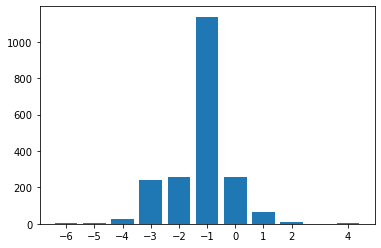

In [7]:
labels, counts = np.unique(hasil, return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.show()

In [8]:
df['sentiment'] = hasil
df.loc[df['sentiment'] == 0, 'sentiment'] = 'Neutral'
for i in range(7):
    df.loc[df['sentiment'] == i, 'sentiment'] = 'Positive'
    df.loc[df['sentiment'] == -i, 'sentiment'] = 'Negative'
df.head()

,tweet,clean_tweet,sentiment
0,"@cattleyaishmn Halo, saya Bencana Bot. Untuk m...",halo bencana bot melaporkan dampak gempa sekit...,Negative
1,Tbh kadang gue mikir pindah ibu kota tuh krn s...,sejujurnya terkadang berpikir pindah kota sebe...,Neutral
2,Bisa ngga sih Tweet nya jangan info gempa teru...,tweet info gempa sekalikali infonya berguncang...,Neutral
3,Selamat pagii Sarapan roti boy dan white coffe...,selamat pagi sarapan roti terkadang white coff...,Negative
4,@AdamPrakoso17 Gempa ora?\n\nInnalillahi \nAlh...,gempa innalillahi alhamdulillah aman keras,Positive


In [84]:
df.to_csv('gempa_tweet.csv', index=False) 

Dari data yang kita dapatkan kata yang paling sering muncul yaitu gempa, terkadang, bergucang, lombok, bencana. 
Dari banyak kata yang muncul didapatkannya distribusi bigram yang mana didapatkan hasil yaitu (dampak, gempa), (halo, bencana), (gempa, sekitarmu), (silakan, balas), (sekitarmu, silakan) yang mana dari bigram dan juga banyak data yang keluar dapat disimpulkan bahwa dari topik gempa ini yang sering dibicarakan iyalah pelaporan terhadap bot halo bencana melalui twitter dan juga tentang dampak terjadinya gempa.
Dari data tersebut juga dilakukan sentiment analisis yang mana hasilnya dapat disimpulkan bahwa tweet tentang gempa lebih menuju ke arah yang negatif dikarenakan memiliki nilai rata rata perhitungan antara positif dan negatif berada pada ngka -1.217 dan juga pada grafik yang yang telah dibuat tingginya nilai sentiment pada sisi negatif yaitu pada angka -1, -2, dan -3 yang mana pada angka -1 merupakan yang terbanyak dari semua bagian yang ada, untuk bagian -3, -2, -1, dan juga 0 memiliki nilai yang lebih dari 200 dan yang lainnya memiliki nilai yang kecil yaitu dibawah 100.